# Q1 Link Analysis

In [ ]:
import numpy as np
import pandas as pd
import math, operator, warnings
import matplotlib.pyplot as plt
import networkx as nx 
import matplotlib.pyplot as plt 
from prettytable import PrettyTable
from tqdm import tqdm
warnings.filterwarnings('ignore')
filename = 'C:/Users/HP/Downloads/soc-sign-bitcoinalpha.csv'

## READING DATA

In [ ]:
def readData(filename):
  return pd.read_csv(filename)

In [ ]:
data = readData(filename)
data.head()

source  target  weight  time stamp
0    7188       1      10  1407470400
1     430       1      10  1376539200
2    3134       1      10  1369713600
3    3026       1      10  1350014400
4    3010       1      10  1347854400

## EDGE REPRESENTATION OF NETWORK

In [ ]:
def calEdgeList(data):
  edge_list = []
  for i in range(len(data)):
    first = data.iloc[i,0]
    second = data.iloc[i,1]
    edge_list.append((first, second))
  return edge_list

In [ ]:
edge_list = calEdgeList(data)
print(edge_list)

[(7188, 1), (430, 1), (3134, 1), (3026, 1), (3010, 1), (804, 1), (160, 1), (95, 1), (377, 1), (888, 1), (89, 1), (1901, 1), (161, 1), (256, 1), (351, 1), (3329, 1), (3341, 1), (649, 1), (1583, 1), (87, 1), (37, 1), (309, 1), (821, 1), (1496, 1), (637, 1), (964, 1), (594, 1), (2249, 1), (554, 1), (20, 1), (2227, 1), (1315, 1), (519, 1), (1316, 1), (2149, 1), (1724, 1), (18, 1), (57, 1), (118, 1), (3254, 1), (1177, 1), (112, 1), (11, 1), (586, 1), (35, 1), (15, 1), (1445, 1), (152, 1), (2, 1), (113, 1), (44, 1), (2401, 1), (10, 1), (2378, 1), (126, 1), (3245, 1), (783, 1), (493, 1), (1358, 1), (1180, 1), (529, 1), (333, 1), (1538, 1), (2282, 1), (1519, 1), (2966, 1), (474, 1), (330, 1), (958, 1), (17, 1), (1295, 1), (38, 1), (1952, 1), (223, 1), (625, 1), (1392, 1), (3355, 1), (1881, 1), (58, 1), (96, 1), (1580, 1), (196, 1), (146, 1), (416, 1), (1198, 1), (3319, 1), (1867, 1), (896, 1), (617, 1), (3300, 1), (1877, 1), (462, 1), (3279, 1), (454, 1), (1860, 1), (121, 1), (151, 1), (1570, 

## ADJACENCY MATRIX REPRESENTATION OF NETWORK

### n*n adjacency matrix:

*   Each of the n pages in the base set has a row and column in the matrix.
*   Entry[i][j] is 1 if page i links to page j, else = 0.

In [ ]:
columns = list(set(list(data['source'])+list(data['target'])))
adj_mtx = pd.DataFrame(index=columns, columns=columns)
adj_mtx = adj_mtx.fillna(0) ## intializing dataframe with zeroes instead of nan's
for i in edge_list:
    adj_mtx[i[0]][i[1]] = 1

print("ADJACENCY MATRIX", "="*120)
display(adj_mtx)

ADJACENCY MATRIX ========================================================================================================================


1     2     3     4     5     6     7     8     9     10    ...  7595  \
1        0     1     0     1     0     0     0     0     1     1  ...     0   
2        1     0     0     1     1     0     1     1     1     1  ...     0   
3        0     1     0     0     1     1     1     1     0     1  ...     1   
4        1     1     0     0     0     0     0     0     1     1  ...     0   
5        0     1     1     0     0     1     0     1     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7600     0     0     0     0     0     0     1     0     1     0  ...     0   
7601     0     0     0     0     0     0     0     0     1     0  ...     0   
7602     0     0     0     0     0     0     1     0     1     0  ...     0   
7603     1     1     0     0     0     0     0     1     0     0  ...     0   
7604     0     0     1     0     0     1     1     0     0     0  ...     1   

      7596  7597  7598  7599  7600  7601  7602  7603  7604  
1        0     1     0     0     0     0     0     1     0  
2        0     0     0     0     0     0     0     1     0  
3        0     0     0     0     0     0     0     0     0  
4        1     0     0     0     0     0     0     1     0  
5        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
7600     0     0     1     1     0     1     1     0     1  
7601     0     0     0     0     0     0     1     0     1  
7602     0     0     0     0     0     0     0     0     1  
7603     0     0     1     0     0     0     0     0     1  
7604     0     0     1     0     0     1     1     0     0  

[3783 rows x 3783 columns]

## STATISITCS FOR NETWORK 


In [ ]:
def calDict(nodes):
  temp_dict = {}
  for i in nodes:
    if i not in temp_dict:
        temp_dict[i] = 1
    else:
        temp_dict[i] += 1
  return temp_dict

In [ ]:
def degree_cal(nodes, flag):
    temp_dict = calDict(nodes)
    if not flag:
        return sum(temp_dict.values())/3783
    elif flag == -1:
        return temp_dict
    elif flag == 1:
        return list((dict(sorted(temp_dict.items(),key=operator.itemgetter(1),reverse=True))).keys())[0]
    else:
        ## here we are calculating how many nodes are having a particular degree
        return calDict(list(temp_dict.values()))

In [ ]:
t = PrettyTable(["PARAMETER", "VALUE"])
## total number of nodes will be count of unique nodes in source and destination columns..
n = len(set(list(data['source'])+list(data['target'])))

## total number of edges will be number of entries in the data set as each entry bw source and destination represents edge..
t.add_row(["TOTAL NUMBER OF EDGES IN THE NETWORK",len(data)])
t.add_row(["-"*50,"-"*50])

t.add_row(["TOTAL NUMBER OF NODES IN THE NETWORK",n])
t.add_row(["-"*50,"-"*50])

calValue = degree_cal(data['target'],1)
t.add_row(["NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK", calValue])
t.add_row(["-"*50,"-"*50])

calValue = degree_cal(data['source'],1)
t.add_row(["NODE WITH MAXIMUM OUT-DEGREE IN THE NETWORK", calValue])
t.add_row(["-"*50,"-"*50])

## In-degree is computed for destination nodes..
calValue = round(degree_cal(data['target'],0),2)
t.add_row(["AVERAGE IN-DEGREE IN THE NETWORK",str(calValue)+"\n(rounded off to two decimal places)"])
t.add_row(["-"*50,"-"*50])

## Out-degree is computed for source nodes...
calValue = round(degree_cal(data['source'],0), 2)
t.add_row(["AVERAGE OUT-DEGREE IN THE NETWORK",str(calValue)+"\n(rounded off to two decimal places)"])
t.add_row(["-"*50,"-"*50])

calValue = round(len(data)/(n*(n-1)),3)
t.add_row(["DENSITY OF THE NETWORK",str(calValue)+"\n(rounded off to three decimal places)"])
print(t)

+----------------------------------------------------+----------------------------------------------------+
|                     PARAMETER                      |                       VALUE                        |
+----------------------------------------------------+----------------------------------------------------+
|        TOTAL NUMBER OF EDGES IN THE NETWORK        |                       24186                        |
| -------------------------------------------------- | -------------------------------------------------- |
|        TOTAL NUMBER OF NODES IN THE NETWORK        |                        3783                        |
| -------------------------------------------------- | -------------------------------------------------- |
|     NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK     |                         1                          |
| -------------------------------------------------- | -------------------------------------------------- |
|    NODE WITH MAXIMUM OUT-D

## NODE IN-DEGREE DISTRIBUTION

In [ ]:
def showGraph(data, x_vals, y_vals, xlabel, title):
  plt.figure(figsize=[30,10])
  plt.scatter(list(data.keys()), list(data.values()))
  plt.title(title, fontsize=40)
  plt.xlabel(xlabel, fontsize=20)
  plt.xticks(x_vals, fontsize=20)
  plt.yticks(y_vals, fontsize=20)
  plt.ylabel("COUNT OF NODES", fontsize=20)
  plt.grid()
  plt.show()

In [ ]:
def calAxisVals(rangeLimit, modVal):
  values = []
  for i in range(1, rangeLimit):
      if(i % modVal == 0 or i == 1):
          values.append(i)
  return values

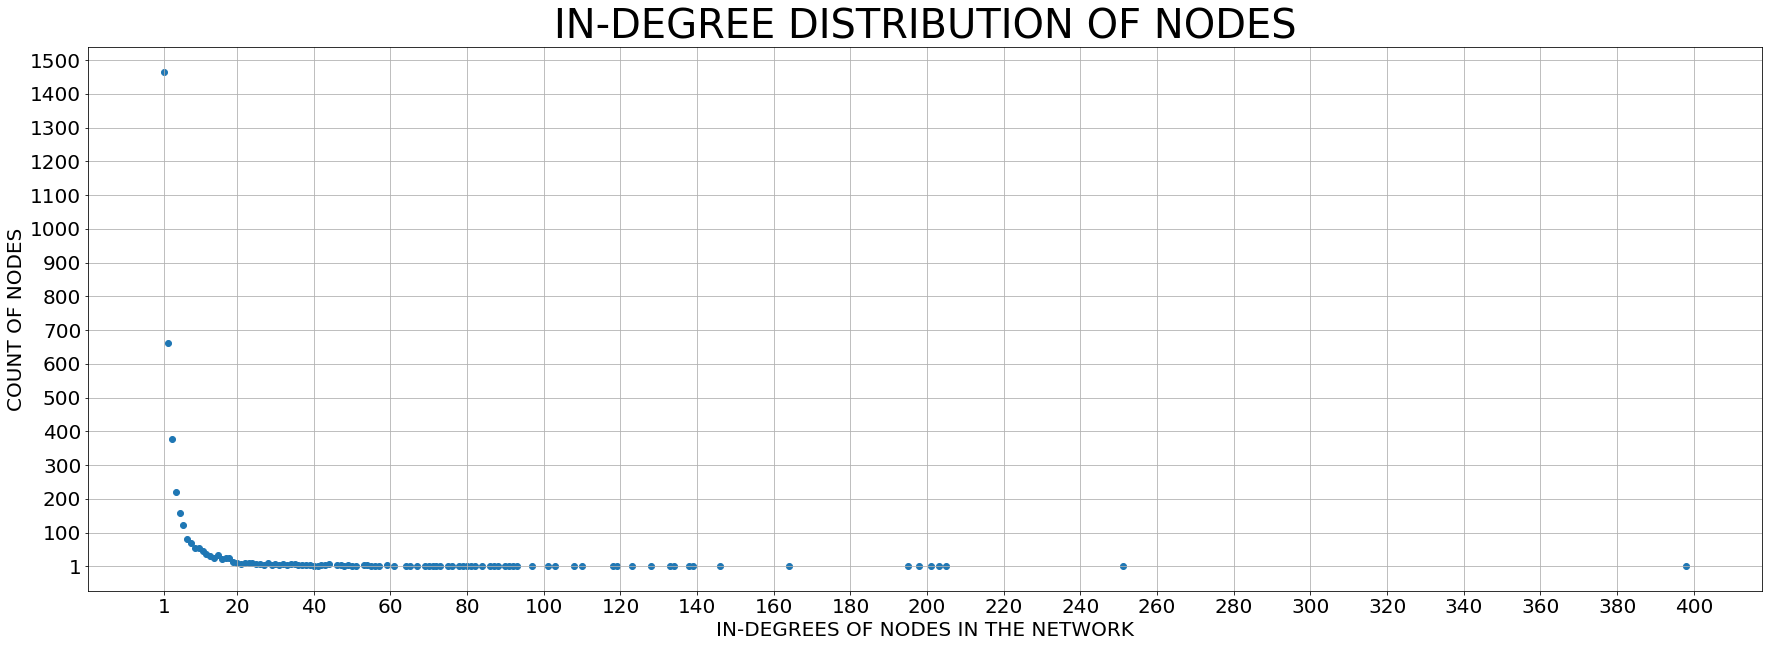

In [ ]:
indegrees_vs_nodecount = degree_cal(data['target'], 2)

showGraph(indegrees_vs_nodecount, calAxisVals(401, 20), calAxisVals(1501, 100), "IN-DEGREES OF NODES IN THE NETWORK", "IN-DEGREE DISTRIBUTION OF NODES")

## NODE OUT-DEGREE DISTRIBUTION

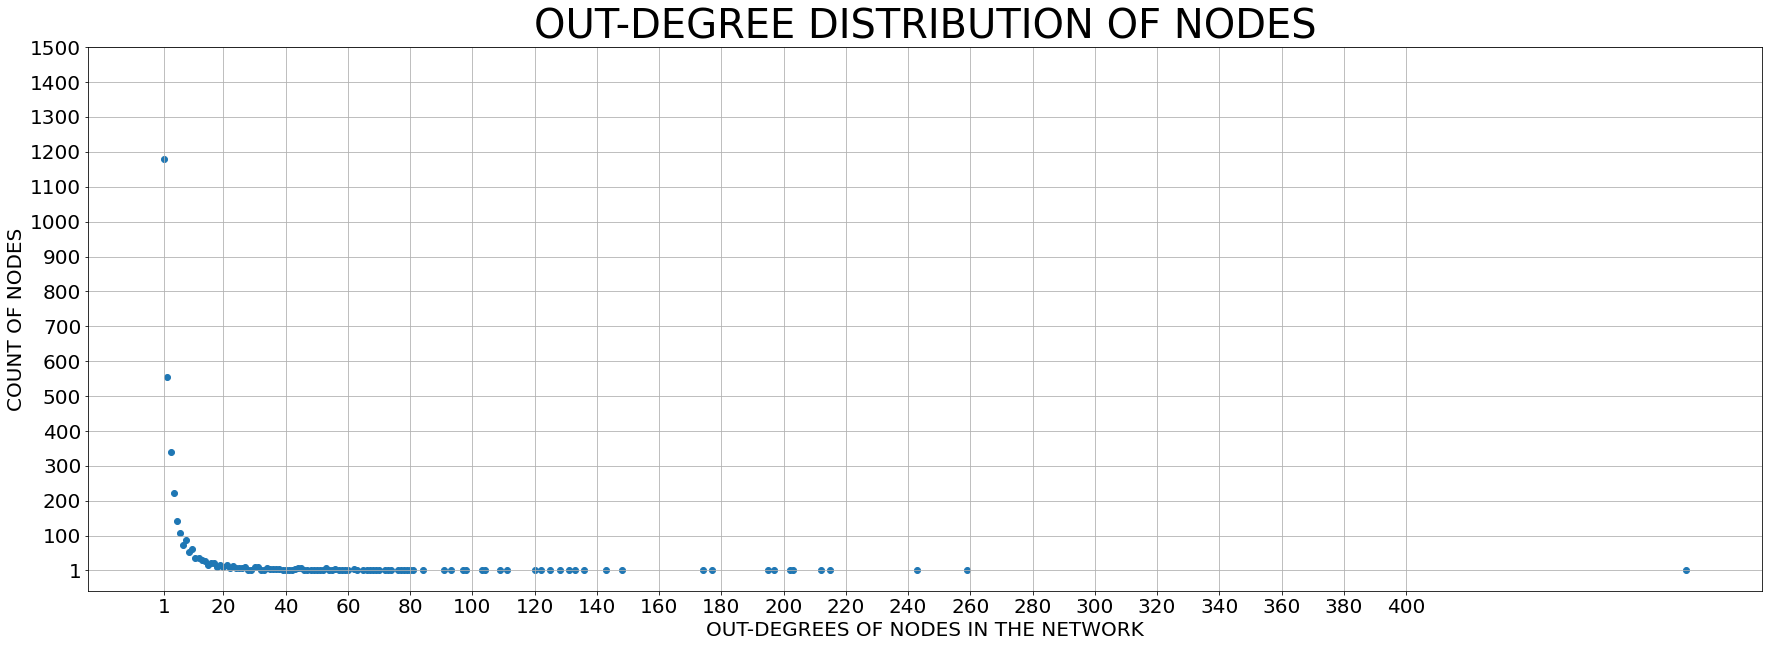

In [ ]:
outdegrees_vs_nodecount = degree_cal(data['source'],2)

showGraph(outdegrees_vs_nodecount, calAxisVals(401, 20), calAxisVals(1501, 100), "OUT-DEGREES OF NODES IN THE NETWORK", "OUT-DEGREE DISTRIBUTION OF NODES")

## CLUSTERING COEFFICIENT FOR NODE

In [ ]:
def calNeigh(nodes, adj_mtx):
  N_v, neighb = 0, []
  for j in nodes:
      if adj_mtx[i][j]:
          neighb.append(j)
  for k in neighb:
      for k2 in neighb:
          if adj_mtx[k][k2]:
              N_v += 1
  return neighb, N_v

In [ ]:
import matplotlib.pyplot as plt
print("\n\t\t\t\t\t   CLUSTERING CO-EFFICIENTS OF THE NODES\n")
nodes = list(set(list(data['source'])+list(data['target'])))
clust_coeff = {}
for i in tqdm(nodes, leave=True, position=0):
  neighb, N_v = calNeigh(nodes, adj_mtx)
  try:
      clust_coeff[i] = (N_v)/(len(neighb)*(len(neighb)-1))
  except:
      clust_coeff[i] = 0


					   CLUSTERING CO-EFFICIENTS OF THE NODES



100%|██████████████████████████████████████████████████████████████████████████████| 3783/3783 [02:14<00:00, 28.19it/s]


In [ ]:
t1 = PrettyTable(['NODE','CLUSTERING-COEFFICIENT'])
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.add_row([i,clust_coeff[i]])
  
print(t1)

+------+------------------------+
| NODE | CLUSTERING-COEFFICIENT |
+------+------------------------+
| 261  |          1.0           |
| 352  |          1.0           |
| 399  |          1.0           |
| 418  |          1.0           |
| 524  |          1.0           |
| 538  |          1.0           |
| 556  |          1.0           |
| 600  |          1.0           |
| 736  |          1.0           |
| 746  |          1.0           |
| 755  |          1.0           |
| 758  |          1.0           |
| 771  |          1.0           |
| 802  |          1.0           |
| 818  |          1.0           |
| 902  |          1.0           |
| 910  |          1.0           |
| 973  |          1.0           |
| 1023 |          1.0           |
| 1047 |          1.0           |
| 1057 |          1.0           |
| 1067 |          1.0           |
| 1091 |          1.0           |
| 1107 |          1.0           |
| 1112 |          1.0           |
| 1114 |          1.0           |
| 1168 |      

In [ ]:
t1 = []
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.append([i,clust_coeff[i]])


In [ ]:
t = pd.DataFrame(t1)

In [ ]:
t.columns = ['Node','Coefficients']

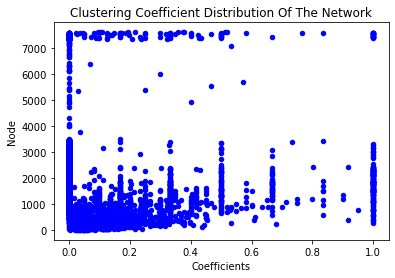

In [ ]:
t.plot(kind = 'scatter',
        x = 'Coefficients',
        y = 'Node',
        color = 'blue')
  
# set the title
plt.title('Clustering Coefficient Distribution Of The Network')
  
# show the plot
plt.show()

In [ ]:
def calCounts(clust_coeff):
  count0, count1 = 0, 0 
  for i in clust_coeff:
    if not clust_coeff[i]:
        count0 += 1
    if clust_coeff[i] == 1:
        count1 += 1
  return count0, count1

In [ ]:
count0, count1 = calCounts(clust_coeff)

print("NODES WITH CLUSTERING COEFFICIENT 0::",count0)
print("NODES WITH CLUSTERING COEFFICIENT 1::",count1)
print("CLUSTERING COEFFICIENT OF THE NETWORK::",sum(list(clust_coeff.values()))/len(nodes))

NODES WITH CLUSTERING COEFFICIENT 0:: 2317
NODES WITH CLUSTERING COEFFICIENT 1:: 173
CLUSTERING COEFFICIENT OF THE NETWORK:: 0.12635262321014096


## IN-DEGREE CENTRALITY FOR NODES

In [ ]:
def calInOutCen(title, columnName):
  print("\n " + title + " CENTRALITY OF THE NODES\n")
  print("="*120)
  cen = degree_cal(data[columnName],-1)
  nodes = list(set(list(data['source'])+list(data['target']))) or list(cen.keys())
  for i in nodes:
      if i not in cen:
          cen[i]=0
  t2 = PrettyTable(['NODE', title])
  for i in dict(sorted(cen.items(),key=operator.itemgetter(1),reverse=True)):
    t2.add_row([i,cen[i]])
  print(t2)

In [ ]:
calInOutCen("IN-DEGREE", 'target')


 IN-DEGREE CENTRALITY OF THE NODES

+------+-----------+
| NODE | IN-DEGREE |
+------+-----------+
|  1   |    398    |
|  3   |    251    |
|  2   |    205    |
|  11  |    203    |
|  4   |    201    |
| 177  |    198    |
|  7   |    195    |
|  10  |    164    |
|  5   |    146    |
|  6   |    139    |
|  26  |    138    |
|  8   |    134    |
|  9   |    133    |
|  12  |    128    |
|  15  |    123    |
|  13  |    119    |
|  33  |    118    |
|  16  |    110    |
|  17  |    108    |
|  22  |    103    |
|  25  |    103    |
|  95  |    101    |
|  14  |     97    |
|  19  |     97    |
| 7603 |     93    |
| 7564 |     92    |
|  21  |     91    |
|  30  |     90    |
|  27  |     88    |
|  24  |     87    |
|  29  |     86    |
| 145  |     84    |
|  35  |     82    |
| 798  |     81    |
|  42  |     80    |
|  40  |     80    |
|  58  |     79    |
|  18  |     78    |
|  43  |     78    |
|  36  |     76    |
|  85  |     75    |
| 7604 |     73    |
|  31  |     72   

## OUT-DEGREE CENTRALITY FOR NODES

In [ ]:
calInOutCen("OUT-DEGREE", 'source')


 OUT-DEGREE CENTRALITY OF THE NODES

+------+------------+
| NODE | OUT-DEGREE |
+------+------------+
|  1   |    490     |
|  8   |    259     |
|  3   |    243     |
|  4   |    215     |
|  7   |    212     |
|  11  |    203     |
| 177  |    202     |
|  15  |    197     |
|  2   |    195     |
|  10  |    177     |
|  5   |    174     |
|  22  |    148     |
|  6   |    148     |
|  9   |    143     |
|  33  |    136     |
|  26  |    133     |
|  58  |    131     |
|  12  |    128     |
|  30  |    125     |
|  13  |    125     |
|  95  |    122     |
|  16  |    120     |
|  17  |    111     |
|  25  |    109     |
|  24  |    104     |
|  19  |    103     |
|  43  |     98     |
|  85  |     97     |
|  14  |     93     |
| 129  |     93     |
|  21  |     91     |
|  40  |     84     |
| 2336 |     81     |
|  38  |     80     |
|  42  |     80     |
| 5342 |     80     |
|  36  |     79     |
|  18  |     78     |
|  51  |     77     |
| 7564 |     76     |
|  45  |     74 

# Q2 PageRank, Hubs and Authority

## PAGERANK SCORES

### Using Library

In [ ]:
G = nx.DiGraph() 
G.add_edges_from(edge_list) 
page_rank_scores = nx.pagerank(G)
print("\n PAGE-RANK SCORES\n", "="*120)
print(dict(sorted(page_rank_scores.items(),key=operator.itemgetter(1),reverse=True)))


 PAGE-RANK SCORES
{1: 0.01699309922840529, 3: 0.008960320960927018, 4: 0.008023439583332511, 2: 0.006623183283223336, 177: 0.006607811108334513, 7: 0.006543114032848891, 11: 0.006192044052141411, 10: 0.005598872299087017, 13: 0.005287958636203424, 6: 0.004780121390485107, 16: 0.004707642392717352, 5: 0.004622857702795663, 7564: 0.004203501017394428, 9: 0.004200846400007224, 8: 0.0041070538170326085, 12: 0.004083127744453426, 26: 0.003901956613591273, 33: 0.003606231563084479, 14: 0.0035589459835260735, 798: 0.0035071949075407825, 17: 0.003495447122947391, 18: 0.0034018120194040016, 25: 0.0033669264634527663, 22: 0.0033578456422887165, 15: 0.0032861179090704017, 79: 0.003281400313320698, 7603: 0.0032054173740647123, 95: 0.0029480420558399742, 69: 0.0029280431902535876, 40: 0.00287596633453213, 21: 0.0028670672239916872, 23: 0.002762129573593084, 30: 0.0027393055183080562, 27: 0.0026838432296959884, 57: 0.0026192498131941706, 19: 0.002616066600811783, 58: 0.0026027877067203095, 145: 0.0

## AUTHORITY SCORE AND HUB SCORE

In [ ]:
def printGraph(G, title):
  plt.figure(figsize =(20, 15))
  plt.title(title)
  nx.draw_networkx(G, with_labels = True)
  return nx.hits(G,normalized = True)

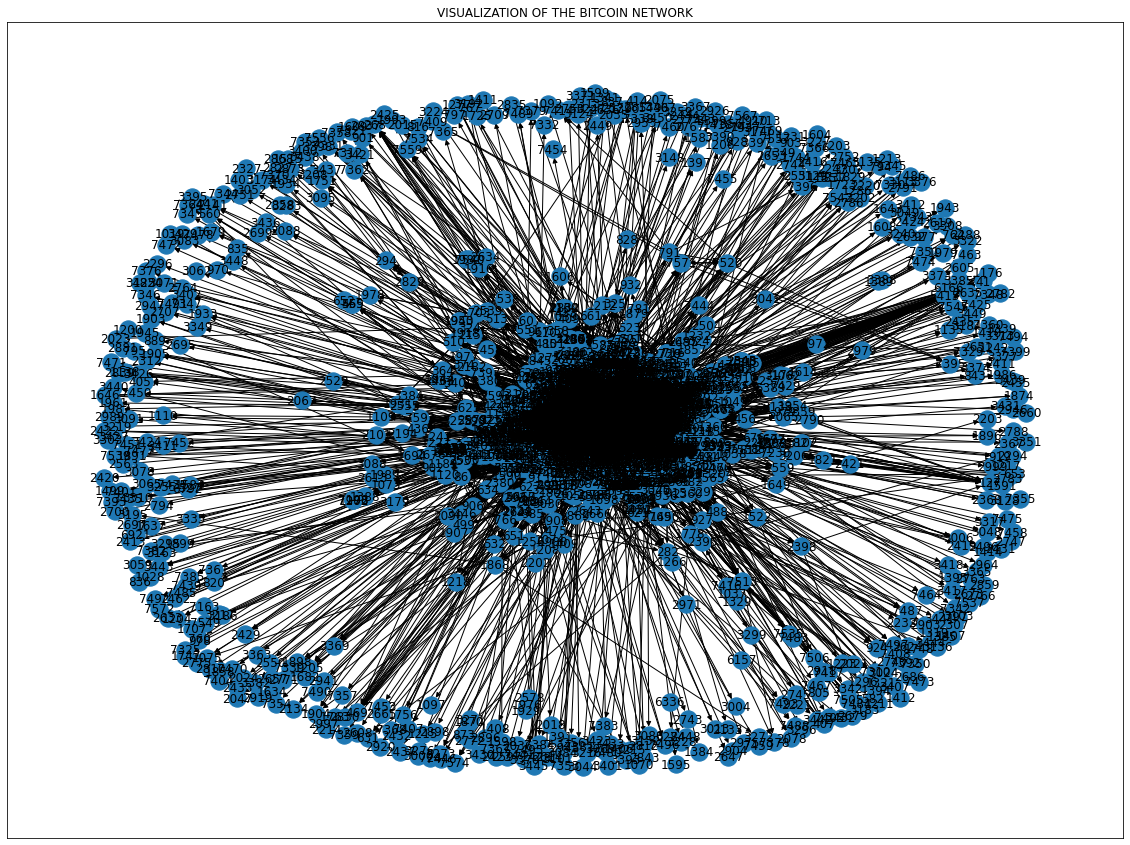

In [ ]:
hub_scores, authority_scores = printGraph(G, "VISUALIZATION OF THE BITCOIN NETWORK")

In [ ]:
print("\n\t\t\t\t\t   HUB SCORES\n", "="*120)
print(dict(sorted(hub_scores.items(),key=operator.itemgetter(1),reverse=True)))



					   HUB SCORES
{11: 0.008537684146406491, 177: 0.006961004363454598, 3: 0.0068841928870852515, 2: 0.006829069854377381, 7: 0.006700524102331483, 8: 0.006528863504454053, 1: 0.0064088516364857575, 22: 0.006132935795818708, 10: 0.006024201182449326, 26: 0.005889592272435859, 24: 0.005540072414284263, 58: 0.005469946837415784, 95: 0.005441980365926652, 5: 0.0053994187200749185, 30: 0.005350599951470691, 6: 0.005194347787796623, 19: 0.005059119020349726, 33: 0.005025729714313085, 85: 0.0049530595334070695, 15: 0.004870427357595186, 9: 0.004860602172996353, 25: 0.004712132582206466, 4: 0.004691121478507348, 17: 0.004455626994899087, 43: 0.004345421028111471, 12: 0.0042634986940198235, 21: 0.004179224971202582, 42: 0.004172923596939346, 32: 0.00403410674880136, 36: 0.0038080363897540874, 51: 0.0037633883138081677, 29: 0.0034853734627322036, 88: 0.0034612985649837297, 40: 0.003352576854368019, 154: 0.0033159002481988283, 47: 0.0033078008055507637, 31: 0.00327883452167069, 70: 0.003237748

In [ ]:
print("\n\t\t\t\t\t   AUTHORITY SCORES\n", "="*120)
print(dict(sorted(authority_scores.items(),key=operator.itemgetter(1),reverse=True)))


					   AUTHORITY SCORES
{11: 0.0077489839736350615, 3: 0.006953360864694101, 2: 0.006811994551232716, 177: 0.0061919248858460065, 7: 0.00605905689153046, 1: 0.005881193763435549, 26: 0.005754122353014952, 10: 0.005389497289245627, 5: 0.005046574210946514, 9: 0.004980701197750108, 24: 0.004952188511291078, 8: 0.004879300311175755, 6: 0.00481713090454911, 95: 0.004673457088188319, 29: 0.004566712255509701, 19: 0.00453267924195531, 31: 0.004195392599516972, 42: 0.004170545806434995, 22: 0.004129233415606318, 33: 0.004124227775853755, 4: 0.004089896516435843, 43: 0.004067548464348967, 25: 0.004009489947672493, 32: 0.003977640534203366, 21: 0.003934323394156804, 17: 0.003928190812826723, 15: 0.003882770208910185, 145: 0.0038084418324501592, 12: 0.003807720157184398, 85: 0.0037939565054231866, 36: 0.003621013468110022, 51: 0.0034736044551243626, 47: 0.0033746106781590377, 30: 0.003354302105948006, 41: 0.00333774736535595, 14: 0.0031940616582198994, 7604: 0.0031589141495214023, 27: 0.003157

### From Scratch

### Page Rank

In [ ]:
'''PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
    A NetworkX graph. Undirected graphs will be converted to a directed
    graph with two directed edges for each undirected edge.

    alpha : float, optional
    Damping parameter for PageRank, default=0.85.

    personalization: dict, optional
    The "personalization vector" consisting of a dictionary with a
    key for every graph node and nonzero personalization value for each node.
    By default, a uniform distribution is used.

    max_iter : integer, optional
    Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
    Error tolerance used to check convergence in power method solver.

    nstart : dictionary, optional
    Starting value of PageRank iteration for each node.

    weight : key, optional
    Edge data key to use as weight. If None weights are set to 1.

    dangling: dict, optional
    The outedges to be assigned to any "dangling" nodes, i.e., nodes without
    any outedges. The dict key is the node the outedge points to and the dict
    value is the weight of that outedge. By default, dangling nodes are given
    outedges according to the personalization vector (uniform if not
    specified). This must be selected to result in an irreducible transition
    matrix (see notes under google_matrix). It may be common to have the
    dangling dict to be the same as the personalization dict.

    Returns
    -------
    pagerank : dictionary
    Dictionary of nodes with PageRank as value

    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence. The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.

    The PageRank algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs by converting each edge in the
    directed graph to two edges.
'''

In [ ]:
def pagerank(G, alpha=0.85, personalization=None,max_iter=100, tol=1.0e-6, nstart=None, weight='weight',dangling=None):
    if len(G) == 0:
        return {}

    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())

    if personalization is None:

        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary ''must have a value for every node.''Missing nodes %s' % missing)
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())

    if dangling is None:

        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary ''must have a value for every node. ' 'Missing nodes %s' % missing)
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:

            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

        # check convergence, l1 norm
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise NetworkXError('pagerank: power iteration failed to converge ''in %d iterations.' % max_iter)


In [ ]:
G = nx.DiGraph() 
G.add_edges_from(edge_list) 
pr = pagerank(G)
pr

{7188: 4.9739967085536536e-05,
 1: 0.016993099228405292,
 430: 0.00028751507169557397,
 3134: 0.00011917626603597539,
 3026: 7.937879011849084e-05,
 3010: 7.937879011849084e-05,
 804: 0.00034797608896262324,
 160: 0.0004624121679665046,
 95: 0.002948042055839976,
 377: 0.0003107517366525091,
 888: 0.00018761408622671417,
 89: 0.001827896997493635,
 1901: 7.937879011849084e-05,
 161: 0.001282547951816451,
 256: 0.0010931452350225065,
 351: 0.0004277054038172364,
 3329: 7.937879011849084e-05,
 3341: 7.937879011849084e-05,
 649: 0.0004168676578369132,
 1583: 7.937879011849084e-05,
 87: 0.001538233490972177,
 37: 0.0015884282196321085,
 309: 0.000710850308500062,
 821: 0.00016645331871448143,
 1496: 0.00010274483263436187,
 637: 0.00023446674062397216,
 964: 0.00021221871167861675,
 594: 0.0002045497275342879,
 2249: 7.937879011849084e-05,
 554: 0.00016531638278637797,
 20: 0.001634744108985811,
 2227: 7.937879011849084e-05,
 1315: 0.0001286050671064112,
 519: 0.0005577942619604857,
 1316:

### HITS

In [ ]:
import networkx as nx
def hits(graph, iterations, tolarance=1.0e-8):
    hubs = dict.fromkeys(graph, 1.0 / graph.number_of_nodes())
    authorities = {}
    # power iteration, which stops after given iterations or reaching tolerance
    for _ in range(iterations):
        last_hubs = hubs
        hubs = dict.fromkeys(last_hubs.keys(), 0)
        authorities = dict.fromkeys(last_hubs.keys(), 0)
        for node in hubs:
            for neighbor in graph[node]:
                authorities[neighbor] += last_hubs[node] * graph[node][neighbor].get('weight', 1)
        for node in hubs:
            for neighbor in graph[node]:
                hubs[node] += authorities[neighbor] * graph[node][neighbor].get('weight', 1)
        scaling = 1.0 / max(hubs.values())
        for node in hubs:
            hubs[node] *= scaling
        scaling = 1.0 / max(authorities.values())
        for node in authorities:
            authorities[node] *= scaling
        err = sum([abs(hubs[node] - last_hubs[node]) for node in hubs])
        if err < tolarance:
            break
    return hubs, authorities


G1 = nx.DiGraph()
G1.add_edges_from(edge_list)
hubs,authorities = hits(G1,5)

In [ ]:
print("Hub Scores: ", hubs)

Hub Scores:  {7188: 0.01773641450887142, 1: 0.7498940032246939, 430: 0.042126293773090726, 3134: 0.041142266477210074, 3026: 0.01773641450887142, 3010: 0.01773641450887142, 804: 0.06419318429621863, 160: 0.03198207321517327, 95: 0.6371391725770787, 377: 0.01828263814485761, 888: 0.025072789889361253, 89: 0.17132813954857867, 1901: 0.01773641450887142, 161: 0.17745019275678883, 256: 0.12300443477746259, 351: 0.10387437614561869, 3329: 0.01773641450887142, 3341: 0.01773641450887142, 649: 0.08376286562446185, 1583: 0.01773641450887142, 87: 0.27877048927529646, 37: 0.2679767466692828, 309: 0.1290052434400096, 821: 0.026007829930145863, 1496: 0.020615308198089044, 637: 0.055371359637170096, 964: 0.032695884400922214, 594: 0.02848785360005503, 2249: 0.01773641450887142, 554: 0.032808380218971867, 20: 0.3474900838988803, 2227: 0.01773641450887142, 1315: 0.017955187101717587, 519: 0.07499589349358508, 1316: 0.01773641450887142, 2149: 0.025309414400931148, 1724: 0.02733734040506788, 18: 0.17023

In [ ]:
print("Authority Scores: ", authorities)

Authority Scores:  {7188: 0.0, 1: 0.7629812867700283, 430: 0.015547634604266813, 3134: 0.05043716170504289, 3026: 0.017925912803921522, 3010: 0.017925912803921522, 804: 0.06502543707903086, 160: 0.03090544571870701, 95: 0.6025928593091977, 377: 0.0181016679413288, 888: 0.033817638610082676, 89: 0.18594537889323326, 1901: 0.017925912803921522, 161: 0.14535578717919853, 256: 0.14547566331683087, 351: 0.09479333871559069, 3329: 0.017925912803921522, 3341: 0.017925912803921522, 649: 0.10265454119279227, 1583: 0.017925912803921522, 87: 0.27660316997921464, 37: 0.2341862658295437, 309: 0.14596054783482817, 821: 0.02564801191952796, 1496: 0.020946342945116863, 637: 0.06584733175897735, 964: 0.05690146343822338, 594: 0.029284062181457737, 2249: 0.017925912803921522, 554: 0.037885340687396345, 20: 0.33725678908338563, 2227: 0.017925912803921522, 1315: 0.018115996942283837, 519: 0.09395234449294437, 1316: 0.017925912803921522, 2149: 0.018943277252462865, 1724: 0.026258196985474814, 18: 0.1682757

In [ ]:
def printGraph(G, title):
  plt.figure(figsize =(20, 15))
  plt.title(title)
  nx.draw_networkx(G, with_labels = True)
  return nx.hits(G,normalized = True)

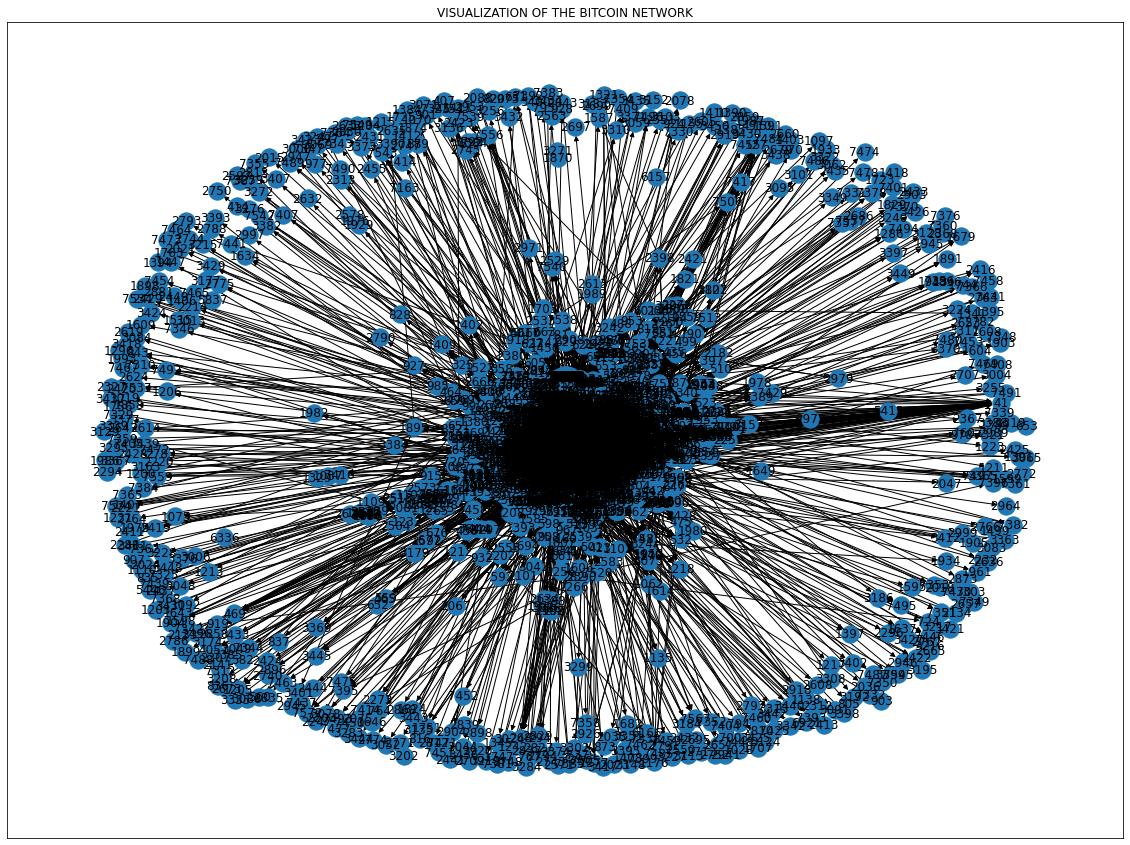

In [ ]:
hubs, authorities = printGraph(G, "VISUALIZATION OF THE BITCOIN NETWORK")